### **Understanding the Bias-Variance Tradeoff and visualizing it with example and python code**

One of the most important and fundamental topics in Machine Learning is the bias-variance tradeoff. In this notebook, we will go through in detail what bias-variance tradeoff is, where does it stem from, why is it necessary to be taken into account, how does it affect our underlying system, and what can be done to improve our ML model.

### **Context: Where does it stem from ?**

The overall idea behind the ML system is to model the hidden distribution of a data set from the samples collected. If you sample enough from the distribution, you can get a fairly accurate re-creation of the distribution as shown below.

<a href="https://ibb.co/dmKqk85"><img src="https://i.ibb.co/mNzwhfc/Capture-d-e-cran-2021-09-20-a-00-35-27.png" alt="Capture-d-e-cran-2021-09-20-a-00-35-27" border="0"></a>

But the problem is that in real life the samples collected are usually noisy. The source of this noise can be a lot of factors such as quantization, sensory limitations, etc. So we do not get the exact output of the distribution, rather a noise factor is added to it. So the problem now is to estimate the function f, given the input x, and its corresponding noisy output y.

<a href="https://ibb.co/vZ5kLpC"><img src="https://i.ibb.co/Fgvz82k/Screenshot-2023-05-30-at-19-17-07.png" alt="Screenshot-2023-05-30-at-19-17-07" border="0"></a>

The goal is to efficiently estimate the function f and filter out the noise. Now since you don’t know much about the noise being added to the sample output, if not addressed properly the ML system ends up mapping the input x to the noisy output y (called over-fitting). This mapping is not an accurate representation of function f and yields high error for the unseen test data.
The bias-variance tradeoff tells us how that in the presence of noise, how complex our underlying system (f`(x)) should be that represents the distribution of our dataset fairly accurately.

In [1]:
# Useful libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = "cmr10"
import random
np.random.seed(54)

Let's create a distribution that follows the sine function.

In [2]:
def dist_function(x):
    f_x = np.sin(x)
    return f_x

Let's add some noise to our sine distribution.

In [3]:
def gen_data(x):
    f_x = dist_function(x)
    b = 0.4
    y = f_x + np.random.uniform(-b, b, len(x))
    sigma = 1/12*(2*b)**2
    return y, f_x, sigma


def get_rand_data(len_ratio, x, y, f_x):
    m = len(x)
    m_new = int(np.round(len_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)

    x1 = x[ind]
    y1 = y[ind]
    f_x1 = f_x[ind]

    return x1, y1, f_x1

## **Bias :**
Bias is termed as the error between the average model prediction $\hat{f}(x)$ and the ground truth $f(x)$
$$bias = \mathbb{E}[\hat{f}(x)] - f(x)$$

The high bias of a model is associated with the following
*   Under-fitting — Fails to capture the data trends
*   Stresses more on generalization
*   High error on both the training and test dataset
*   An overly simplified model

## **Variance :**
Variance refers to the average variability in the model prediction for the given dataset.
$$ variance = \mathbb{E}[(\hat{f}(x) - \mathbb{E}[\hat{f}(x)])^2] $$

The high variance of a model is associated with the following
*   Over-fitting — Ends up modeling the noise in the data set
*   Stresses more on fitting each data point as close as possible
*   Low error on training data, but a high error on test data
*   An overly complex model and sparse training data.

We will try to fit our noisy sine distribution with polynomial functions of degree 1 up to 11.

And let's see how each polynomial function fits the data.

bias:  [5.168777959021636, 4.753916269570472, 1.7753424922472225, 0.5464788491939353, 0.521340389301883, 1.4629739979767502]
var:  [0.04757020905530121, 0.18365851390986293, 0.19635334365588375, 0.10881108000876172, 1.5560429109462297, 21.755291909732154]


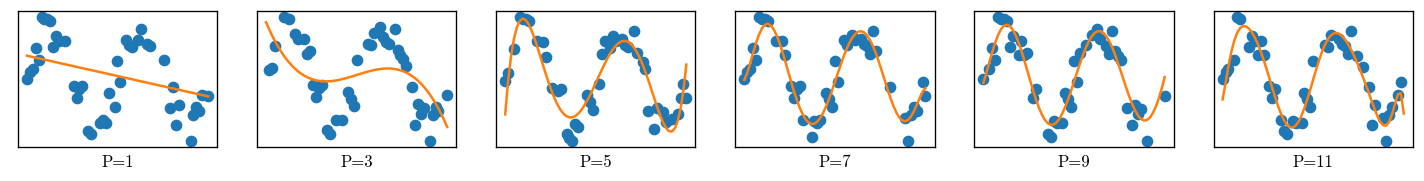

In [4]:
x_orig = np.arange(0, 4 * np.pi, .2)

y_orig, f_x_orig, sigma = gen_data(x_orig)
p_order = [1, 3, 5, 7, 9, 11]
num_data = 2000

f, ax = plt.subplots(1,len(p_order), figsize=(15, 1.5), dpi=120, facecolor='w', edgecolor='k')
t = np.arange(0.1, 4*np.pi, .2)
P=[]
bb=[]
vv=[]
for i, p_val in enumerate(p_order):
    exp_f_x = np.zeros(len(t))
    exp_f_x_plot = np.zeros(len(x_orig))
    var = np.zeros(len(t))
    for j in range(num_data):
        x, y, f_x = get_rand_data(0.7, x_orig, y_orig, f_x_orig)
        p = np.poly1d(np.polyfit(x, y, p_val))
        P.append(p)
        exp_f_x = exp_f_x + p(t)
        exp_f_x_plot = exp_f_x_plot + p(x_orig)

    exp_f_x = exp_f_x/num_data
    exp_f_x_plot = exp_f_x_plot / num_data
    ax[i].plot(x, y, 'o', x_orig, exp_f_x_plot, '-')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    ax[i].set_xlabel('P='+str(p_order[i]))
    bias = np.linalg.norm(exp_f_x-dist_function(t))
    bb.append(bias)

    for j in range(num_data):
        p_t = P.pop(0)
        var = var + np.square(p_t(t)-exp_f_x)
    var = var/num_data
    variance = np.linalg.norm(var)
    vv.append(variance)


print("bias: ", bb)
print("var: ",vv)

**Exercise :** What can you say about the polynomial function of degree 1 (`P=1`) and what about the polynomial function of degree 11 (`P=11`) ?
Which one of the polynomials fit the data best ?

**Answer here :**

Let's plot the Bias and Variance and see the intuition behind the tradeoff

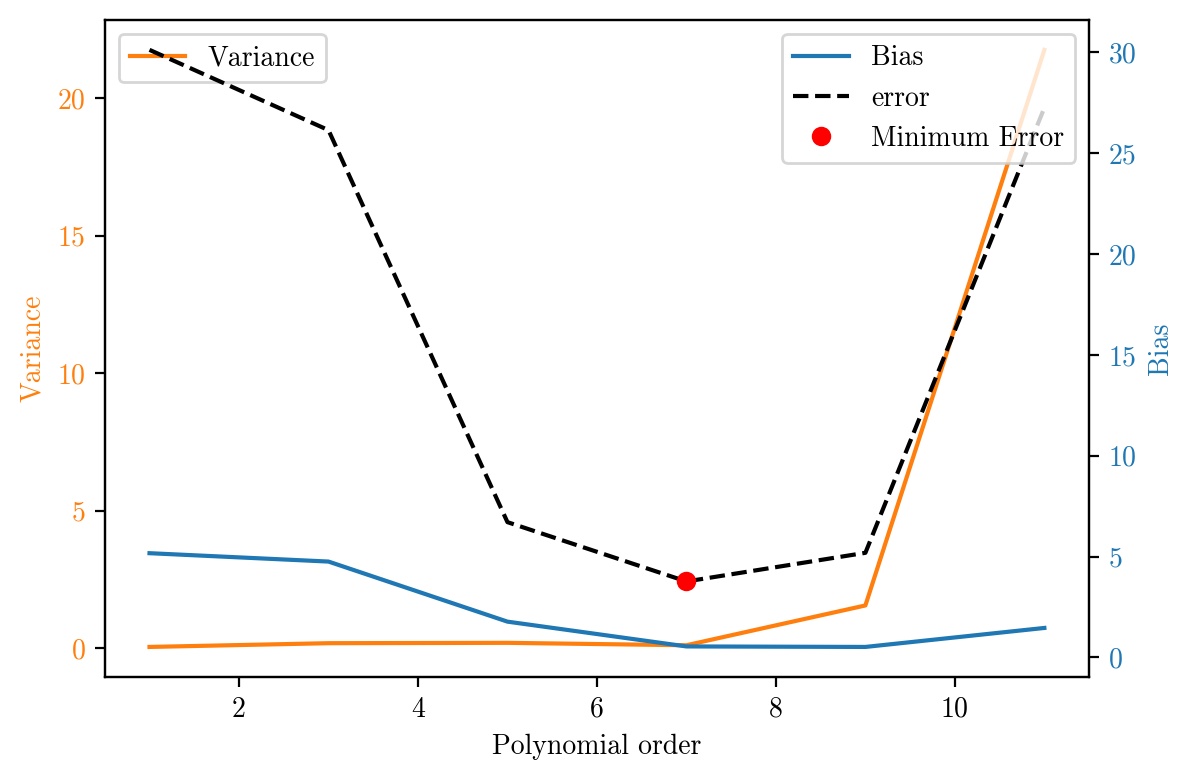

In [5]:
fig, ax1 = plt.subplots(dpi=200)

color = 'tab:orange'
ax1.set_xlabel('Polynomial order')
ax1.set_ylabel('Variance', color=color)
ax1.plot(p_order, vv, color=color, label = 'Variance')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Bias', color=color)
ax2.plot(p_order, bb, color=color,  label = 'Bias')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

error = np.square(bb)+vv+sigma*len(t)
min_ind = np.argmin(error)
plt.plot(p_order, error, 'k--', label = 'error')
plt.plot(p_order[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()

It can be seen that the polynomial of degree 7 gives us the best fit for our sine curve in the presence of noise.